**Install Required Libraries**

In [ ]:
!pip install pandas numpy scikit-learn seaborn matplotlib


**Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


**Read the CSV File**

In [5]:
# Set the file path
file_path = 'WineQT.csv'

# Read the CSV file
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

**Data Exploration**

In [6]:
# Check the shape of the dataset
print("Shape of the dataset:", data.shape)

# Check the columns
print("Columns in the dataset:", data.columns)

# Display basic statistics
data.describe()


Shape of the dataset: (1143, 13)
Columns in the dataset: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             21.000000     0.995570   
50%       0.079000            13.000000             37.000000     0.996680   
75%       0.090000            21.000000             61.000000     0.997845   
max       0.611000            68.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality           Id  
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000  
mean      3.311015     0.657708    10.442111     5.657043   804.969379  
std       0.156664     0.170399     1.082196     0.805824   463.997116  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.205000     0.550000     9.500000     5.000000   411.000000  
50%       3.310000     0.620000    10.200000     6.000000   794.000000  
75%       3.400000     0.730000    11.100000     6.000000  1209.500000  
max       4.010000     2.000000    14.900000     8.000000  1597.000000

**Data Cleaning**

In [7]:
# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

# If there are missing values, we can handle them. For example:
# data.fillna(data.mean(), inplace=True)  # Example: Fill missing values with mean


Missing values in each column:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


**Data Visualization**

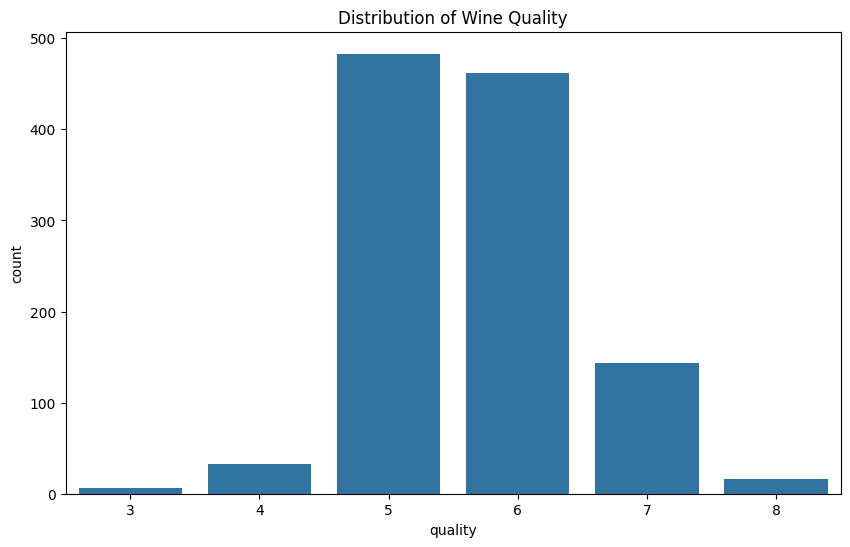

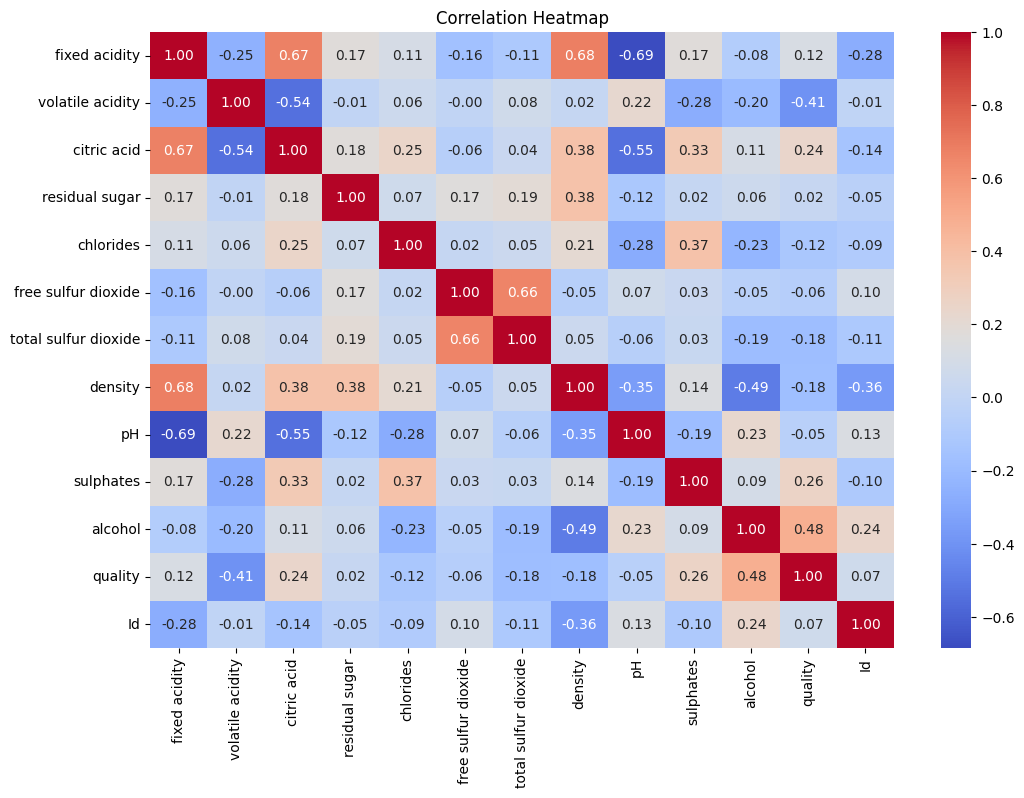

In [8]:
# Visualize the distribution of wine quality
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=data)
plt.title('Distribution of Wine Quality')
plt.show()

# Visualize the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Feature Selection**

In [9]:
# Define features and target variable
X = data.drop(columns=['quality', 'Id'])
y = data['quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Model Training**

**Random Forest Classifier**

**Check Class Distribution**

In [11]:
# Check class distribution in the training and testing sets
print("Training set class distribution:")
print(y_train.value_counts())
print("\nTesting set class distribution:")
print(y_test.value_counts())


Training set class distribution:
quality
5    387
6    363
7    117
4     27
8     14
3      6
Name: count, dtype: int64

Testing set class distribution:
quality
6    99
5    96
7    26
4     6
8     2
Name: count, dtype: int64


**Adjust the Random Forest Model**

**Use Class Weights**

In [12]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predictions and evaluation
rf_predictions = rf_model.predict(X_test)

print("Random Forest Classifier Report:")
print(classification_report(y_test, rf_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))


Random Forest Classifier Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.79      0.75        96
           6       0.66      0.68      0.67        99
           7       0.76      0.62      0.68        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.43      0.42      0.42       229
weighted avg       0.67      0.69      0.68       229

Random Forest Accuracy: 0.6943231441048034


C:\Users\MATHAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MATHAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MATHAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

**Under-sampling or Over-sampling**

In [13]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the Random Forest model on the resampled data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)

# Predictions and evaluation
rf_predictions = rf_model.predict(X_test)

print("Random Forest Classifier Report:")
print(classification_report(y_test, rf_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))


Random Forest Classifier Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.70      0.72      0.71        96
           6       0.62      0.48      0.55        99
           7       0.50      0.77      0.61        26
           8       0.00      0.00      0.00         2

    accuracy                           0.60       229
   macro avg       0.30      0.33      0.31       229
weighted avg       0.62      0.60      0.60       229

Random Forest Accuracy: 0.5982532751091703


C:\Users\MATHAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MATHAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MATHAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Modify the Classification Report Call**

In [14]:
print(classification_report(y_test, rf_predictions, zero_division=0))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.70      0.72      0.71        96
           6       0.62      0.48      0.55        99
           7       0.50      0.77      0.61        26
           8       0.00      0.00      0.00         2

    accuracy                           0.60       229
   macro avg       0.30      0.33      0.31       229
weighted avg       0.62      0.60      0.60       229



**Visualize Class Predictions**

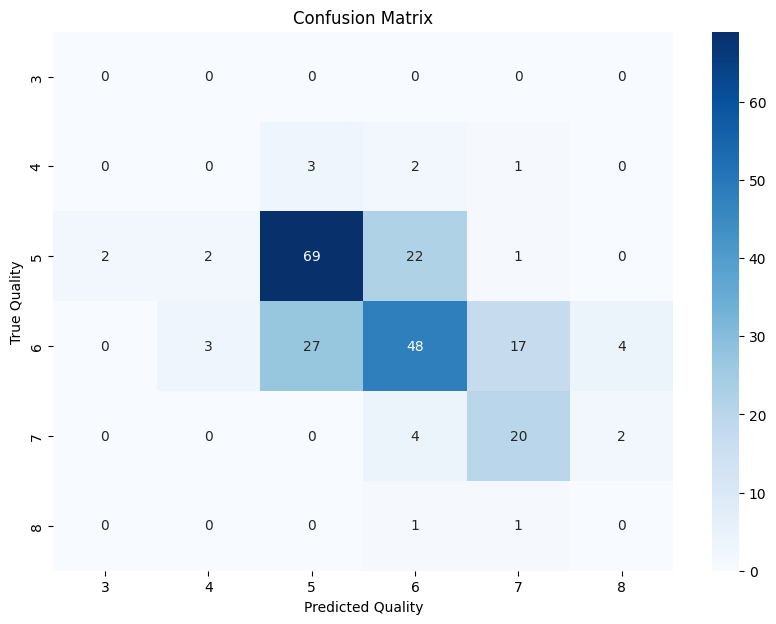

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Quality')
plt.ylabel('True Quality')
plt.show()


In [16]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
rf_predictions = rf_model.predict(X_test)

print("Random Forest Classifier Report:")
print(classification_report(y_test, rf_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))


Random Forest Classifier Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.80      0.76        96
           6       0.68      0.67      0.67        99
           7       0.72      0.69      0.71        26
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.42      0.43      0.43       229
weighted avg       0.68      0.70      0.69       229

Random Forest Accuracy: 0.7030567685589519


C:\Users\MATHAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MATHAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MATHAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

**Stochastic Gradient Descent Classifier**

In [17]:
# Train a Stochastic Gradient Descent Classifier
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)

# Predictions and evaluation
sgd_predictions = sgd_model.predict(X_test)

print("SGD Classifier Report:")
print(classification_report(y_test, sgd_predictions))
print("SGD Accuracy:", accuracy_score(y_test, sgd_predictions))


SGD Classifier Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.46      0.98      0.63        96
           6       0.56      0.05      0.09        99
           7       0.38      0.23      0.29        26
           8       0.00      0.00      0.00         2

    accuracy                           0.46       229
   macro avg       0.28      0.25      0.20       229
weighted avg       0.48      0.46      0.34       229

SGD Accuracy: 0.4585152838427948


C:\Users\MATHAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MATHAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MATHAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

**Support Vector Classifier**

In [18]:
# Train a Support Vector Classifier
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)

# Predictions and evaluation
svc_predictions = svc_model.predict(X_test)

print("SVC Classifier Report:")
print(classification_report(y_test, svc_predictions))
print("SVC Accuracy:", accuracy_score(y_test, svc_predictions))


SVC Classifier Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.43      0.54        96
           6       0.51      0.88      0.64        99
           7       1.00      0.04      0.07        26
           8       0.00      0.00      0.00         2

    accuracy                           0.56       229
   macro avg       0.45      0.27      0.25       229
weighted avg       0.64      0.56      0.51       229

SVC Accuracy: 0.5633187772925764


C:\Users\MATHAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MATHAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MATHAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

**Visualize Predictions**

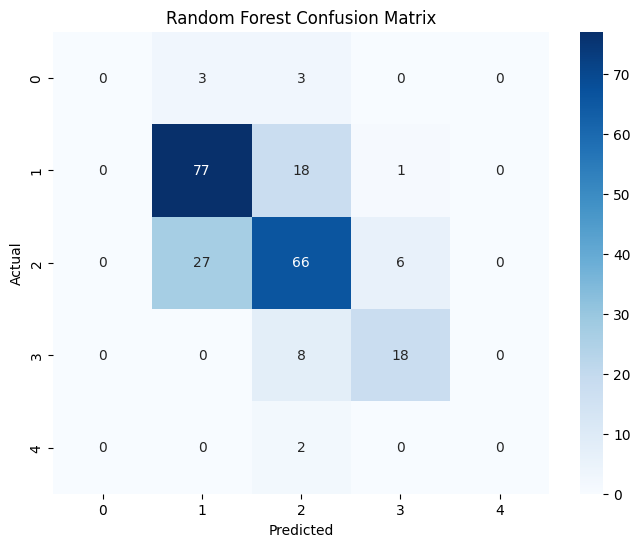

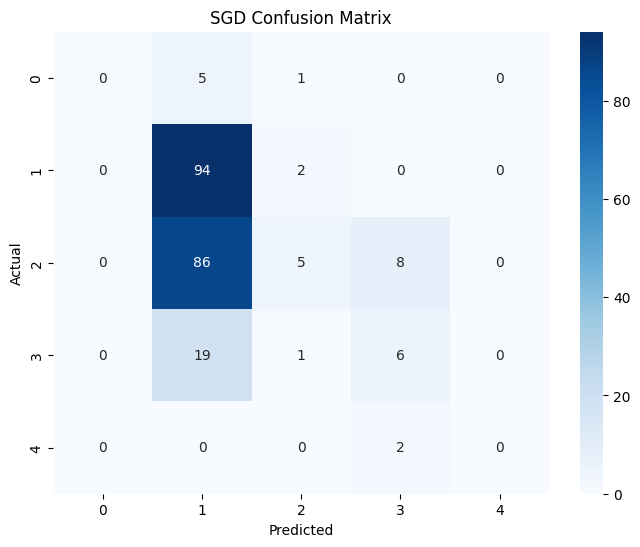

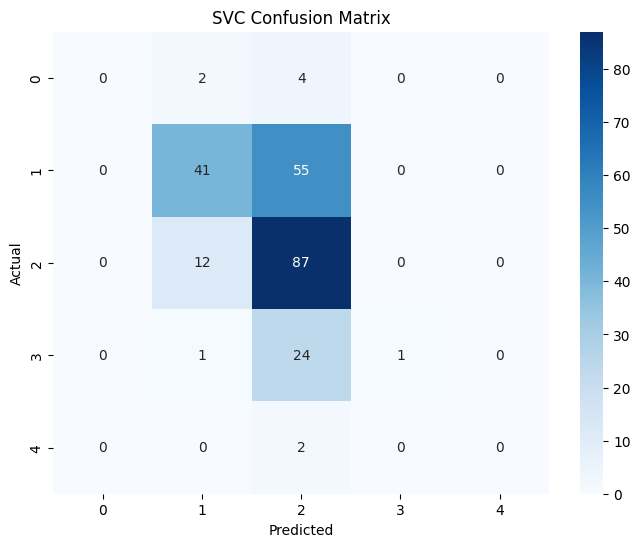

In [19]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Random Forest Confusion Matrix
plot_confusion_matrix(confusion_matrix(y_test, rf_predictions), title='Random Forest Confusion Matrix')

# SGD Confusion Matrix
plot_confusion_matrix(confusion_matrix(y_test, sgd_predictions), title='SGD Confusion Matrix')

# SVC Confusion Matrix
plot_confusion_matrix(confusion_matrix(y_test, svc_predictions), title='SVC Confusion Matrix')


**Hyperparameter Tuning**

In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 2: Load the dataset
data = pd.read_csv(r'C:\Users\MATHAN\Downloads\WINE QUALITY PREDICTION\WineQT.csv')

# Step 3: Prepare your features and target variable
X = data.drop(columns=['quality', 'Id'])
y = data['quality']

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)

# Step 6: Predictions with the best model
best_rf_model = grid_search_rf.best_estimator_
rf_predictions = best_rf_model.predict(X_test)

print("Random Forest Classifier Report:")
print(classification_report(y_test, rf_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))


Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Classifier Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.78      0.75        96
           6       0.66      0.68      0.67        99
           7       0.70      0.62      0.65        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.41      0.41      0.41       229
weighted avg       0.67      0.69      0.68       229

Random Forest Accuracy: 0.6899563318777293


C:\Users\MATHAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MATHAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MATHAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

**Feature Importance Analysis**

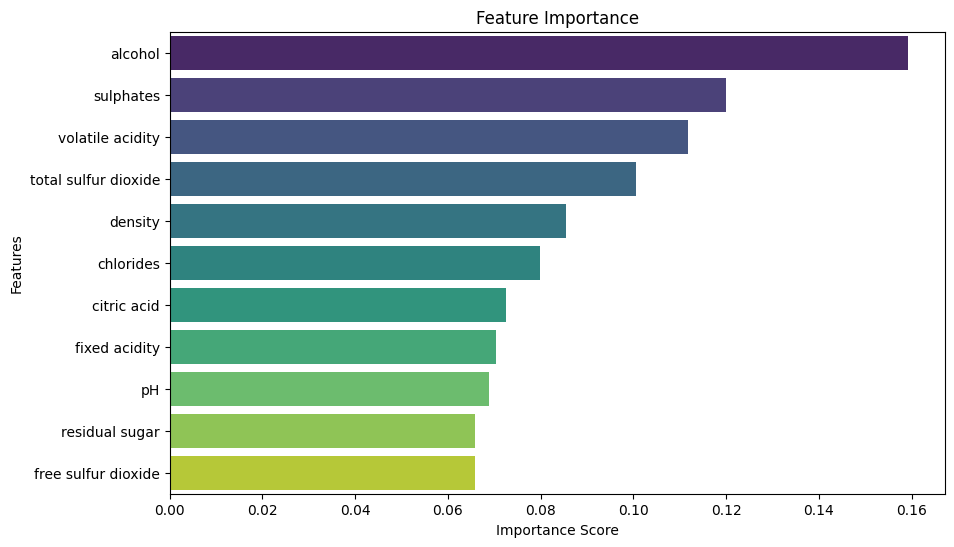

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# After running the hyperparameter tuning code
# Ensure best_rf_model is defined as below
best_rf_model = grid_search_rf.best_estimator_

# Feature importance
importances = best_rf_model.feature_importances_
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.Importance, y=feature_importances.index, hue=feature_importances.index, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


**Cross-Validation**

In [9]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest using the best model from GridSearchCV
cv_scores = cross_val_score(best_rf_model, X, y, cv=5)

print("Cross-validation scores for Random Forest:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores for Random Forest: [0.55021834 0.62008734 0.60262009 0.5877193  0.56578947]
Mean cross-validation score: 0.5852869072243928


**Ensemble Learning**

In [11]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

# Make sure you have trained the SGD and SVC models before this step
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)

svc_model = SVC(probability=True, random_state=42)  # probability=True is needed for soft voting
svc_model.fit(X_train, y_train)

# Create a voting classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', best_rf_model),  # Use the best Random Forest model
    ('sgd', sgd_model),      # Stochastic Gradient Descent model
    ('svc', svc_model)],     # Support Vector Classifier model
    voting='hard')           # 'hard' voting means the majority class will be taken

# Fit the voting classifier
voting_clf.fit(X_train, y_train)

# Make predictions and evaluate
voting_predictions = voting_clf.predict(X_test)

print("Voting Classifier Accuracy:", accuracy_score(y_test, voting_predictions))


Voting Classifier Accuracy: 0.6462882096069869


**Additional Visualizations**

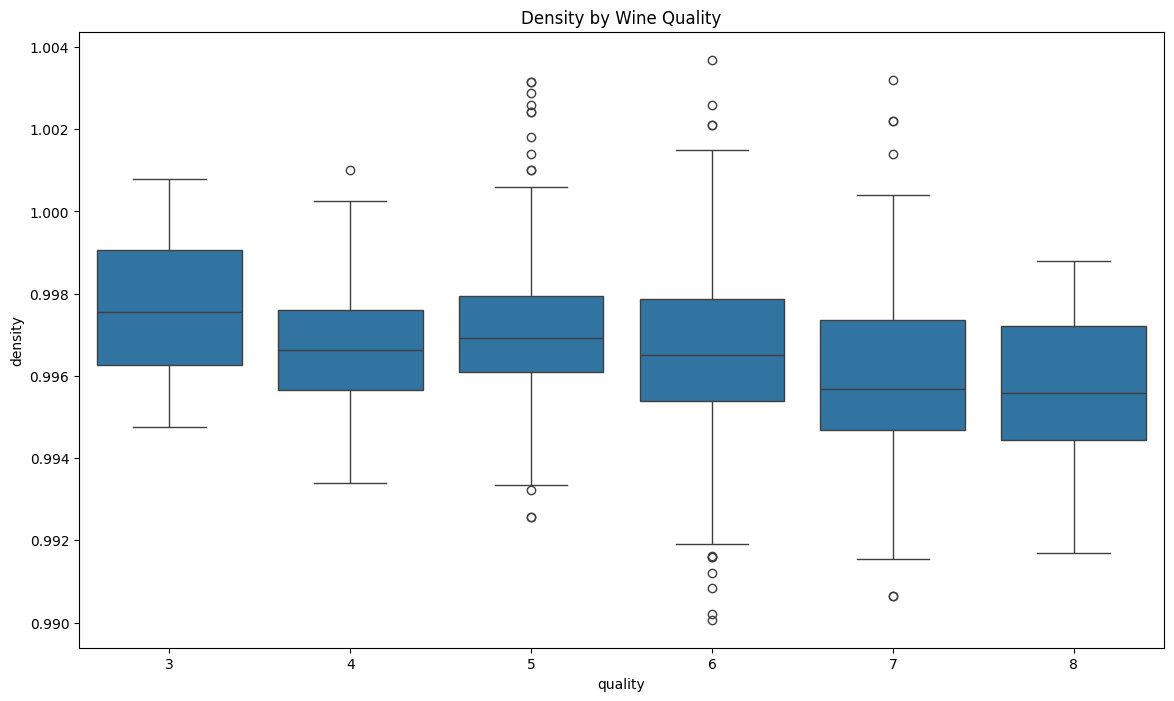

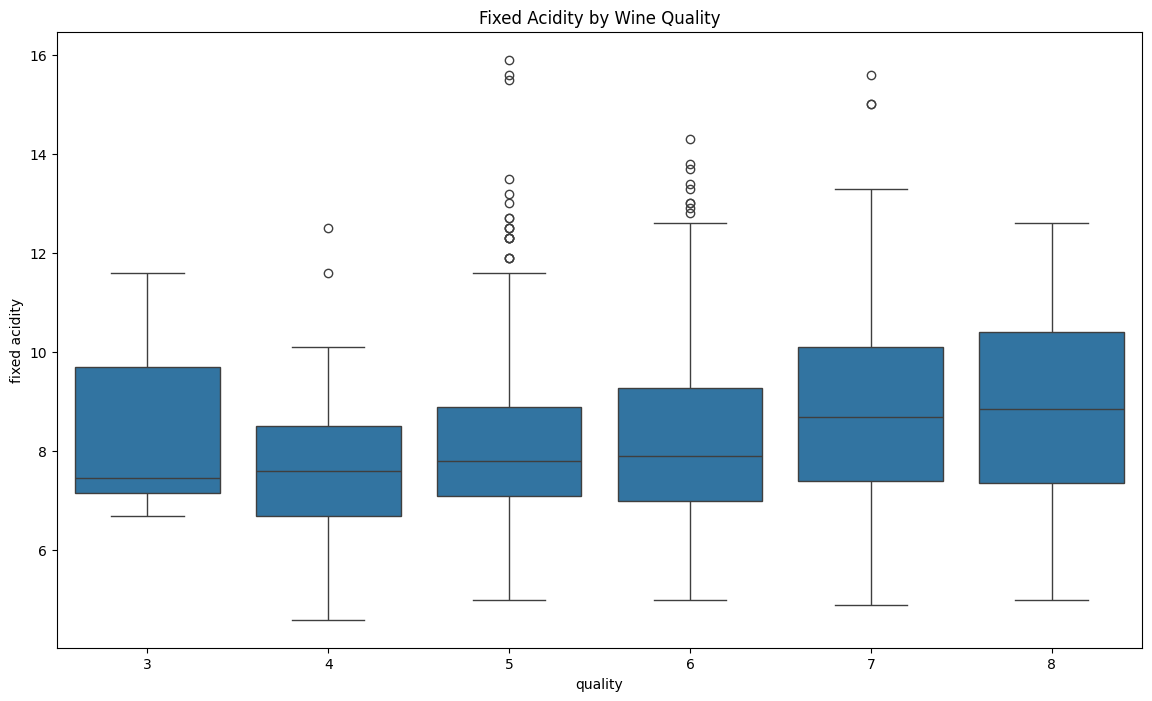

In [12]:
# Box plots for selected features
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='quality', y='density')
plt.title('Density by Wine Quality')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='quality', y='fixed acidity')
plt.title('Fixed Acidity by Wine Quality')
plt.show()


**Model Comparison**

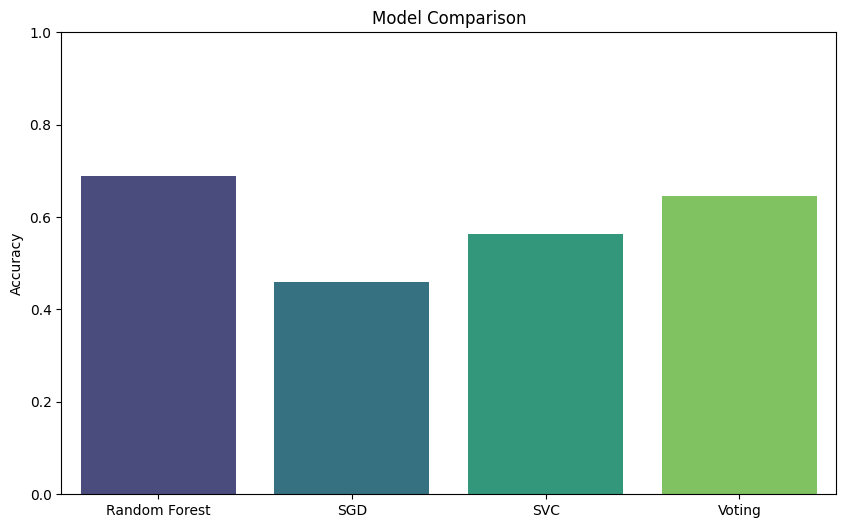

In [15]:
# Assuming you have already trained your models: best_rf_model, sgd_model, svc_model, and voting_clf

# Make predictions
rf_predictions = best_rf_model.predict(X_test)
sgd_predictions = sgd_model.predict(X_test)
svc_predictions = svc_model.predict(X_test)
voting_predictions = voting_clf.predict(X_test)

# Collecting accuracy scores
models = ['Random Forest', 'SGD', 'SVC', 'Voting']
scores = [
    accuracy_score(y_test, rf_predictions),
    accuracy_score(y_test, sgd_predictions),
    accuracy_score(y_test, svc_predictions),
    accuracy_score(y_test, voting_predictions)
]

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=scores, palette='viridis', hue= models)  # Add a color palette for better visuals
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


**Handling Imbalanced Classes**

In [17]:
# Step 1: Import the necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Step 2: Apply SMOTE to handle class imbalance
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 3: Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Step 4: Define and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Ensure you define the model here
rf_model.fit(X_train_resampled, y_train_resampled)  # Fit the model on the resampled dataset

# Step 5: Make predictions on the test set
rf_predictions_resampled = rf_model.predict(X_test_resampled)

# Step 6: Evaluate the model's performance
from sklearn.metrics import classification_report, accuracy_score

print("Random Forest Classifier Report on Resampled Data:")
print(classification_report(y_test_resampled, rf_predictions_resampled))
print("Random Forest Accuracy on Resampled Data:", accuracy_score(y_test_resampled, rf_predictions_resampled))


Random Forest Classifier Report on Resampled Data:
              precision    recall  f1-score   support

           3       0.99      1.00      0.99        97
           4       0.94      0.96      0.95        92
           5       0.80      0.69      0.74       108
           6       0.65      0.66      0.66        95
           7       0.83      0.90      0.86        96
           8       0.95      0.97      0.96        92

    accuracy                           0.86       580
   macro avg       0.86      0.86      0.86       580
weighted avg       0.86      0.86      0.86       580

Random Forest Accuracy on Resampled Data: 0.8568965517241379


**Save and Load Models**

In [18]:
import joblib

# Save the model
joblib.dump(rf_model, 'random_forest_model.pkl')

# Load the model
loaded_rf_model = joblib.load('random_forest_model.pkl')


**Pair Plot**

<Figure size 1200x800 with 0 Axes>

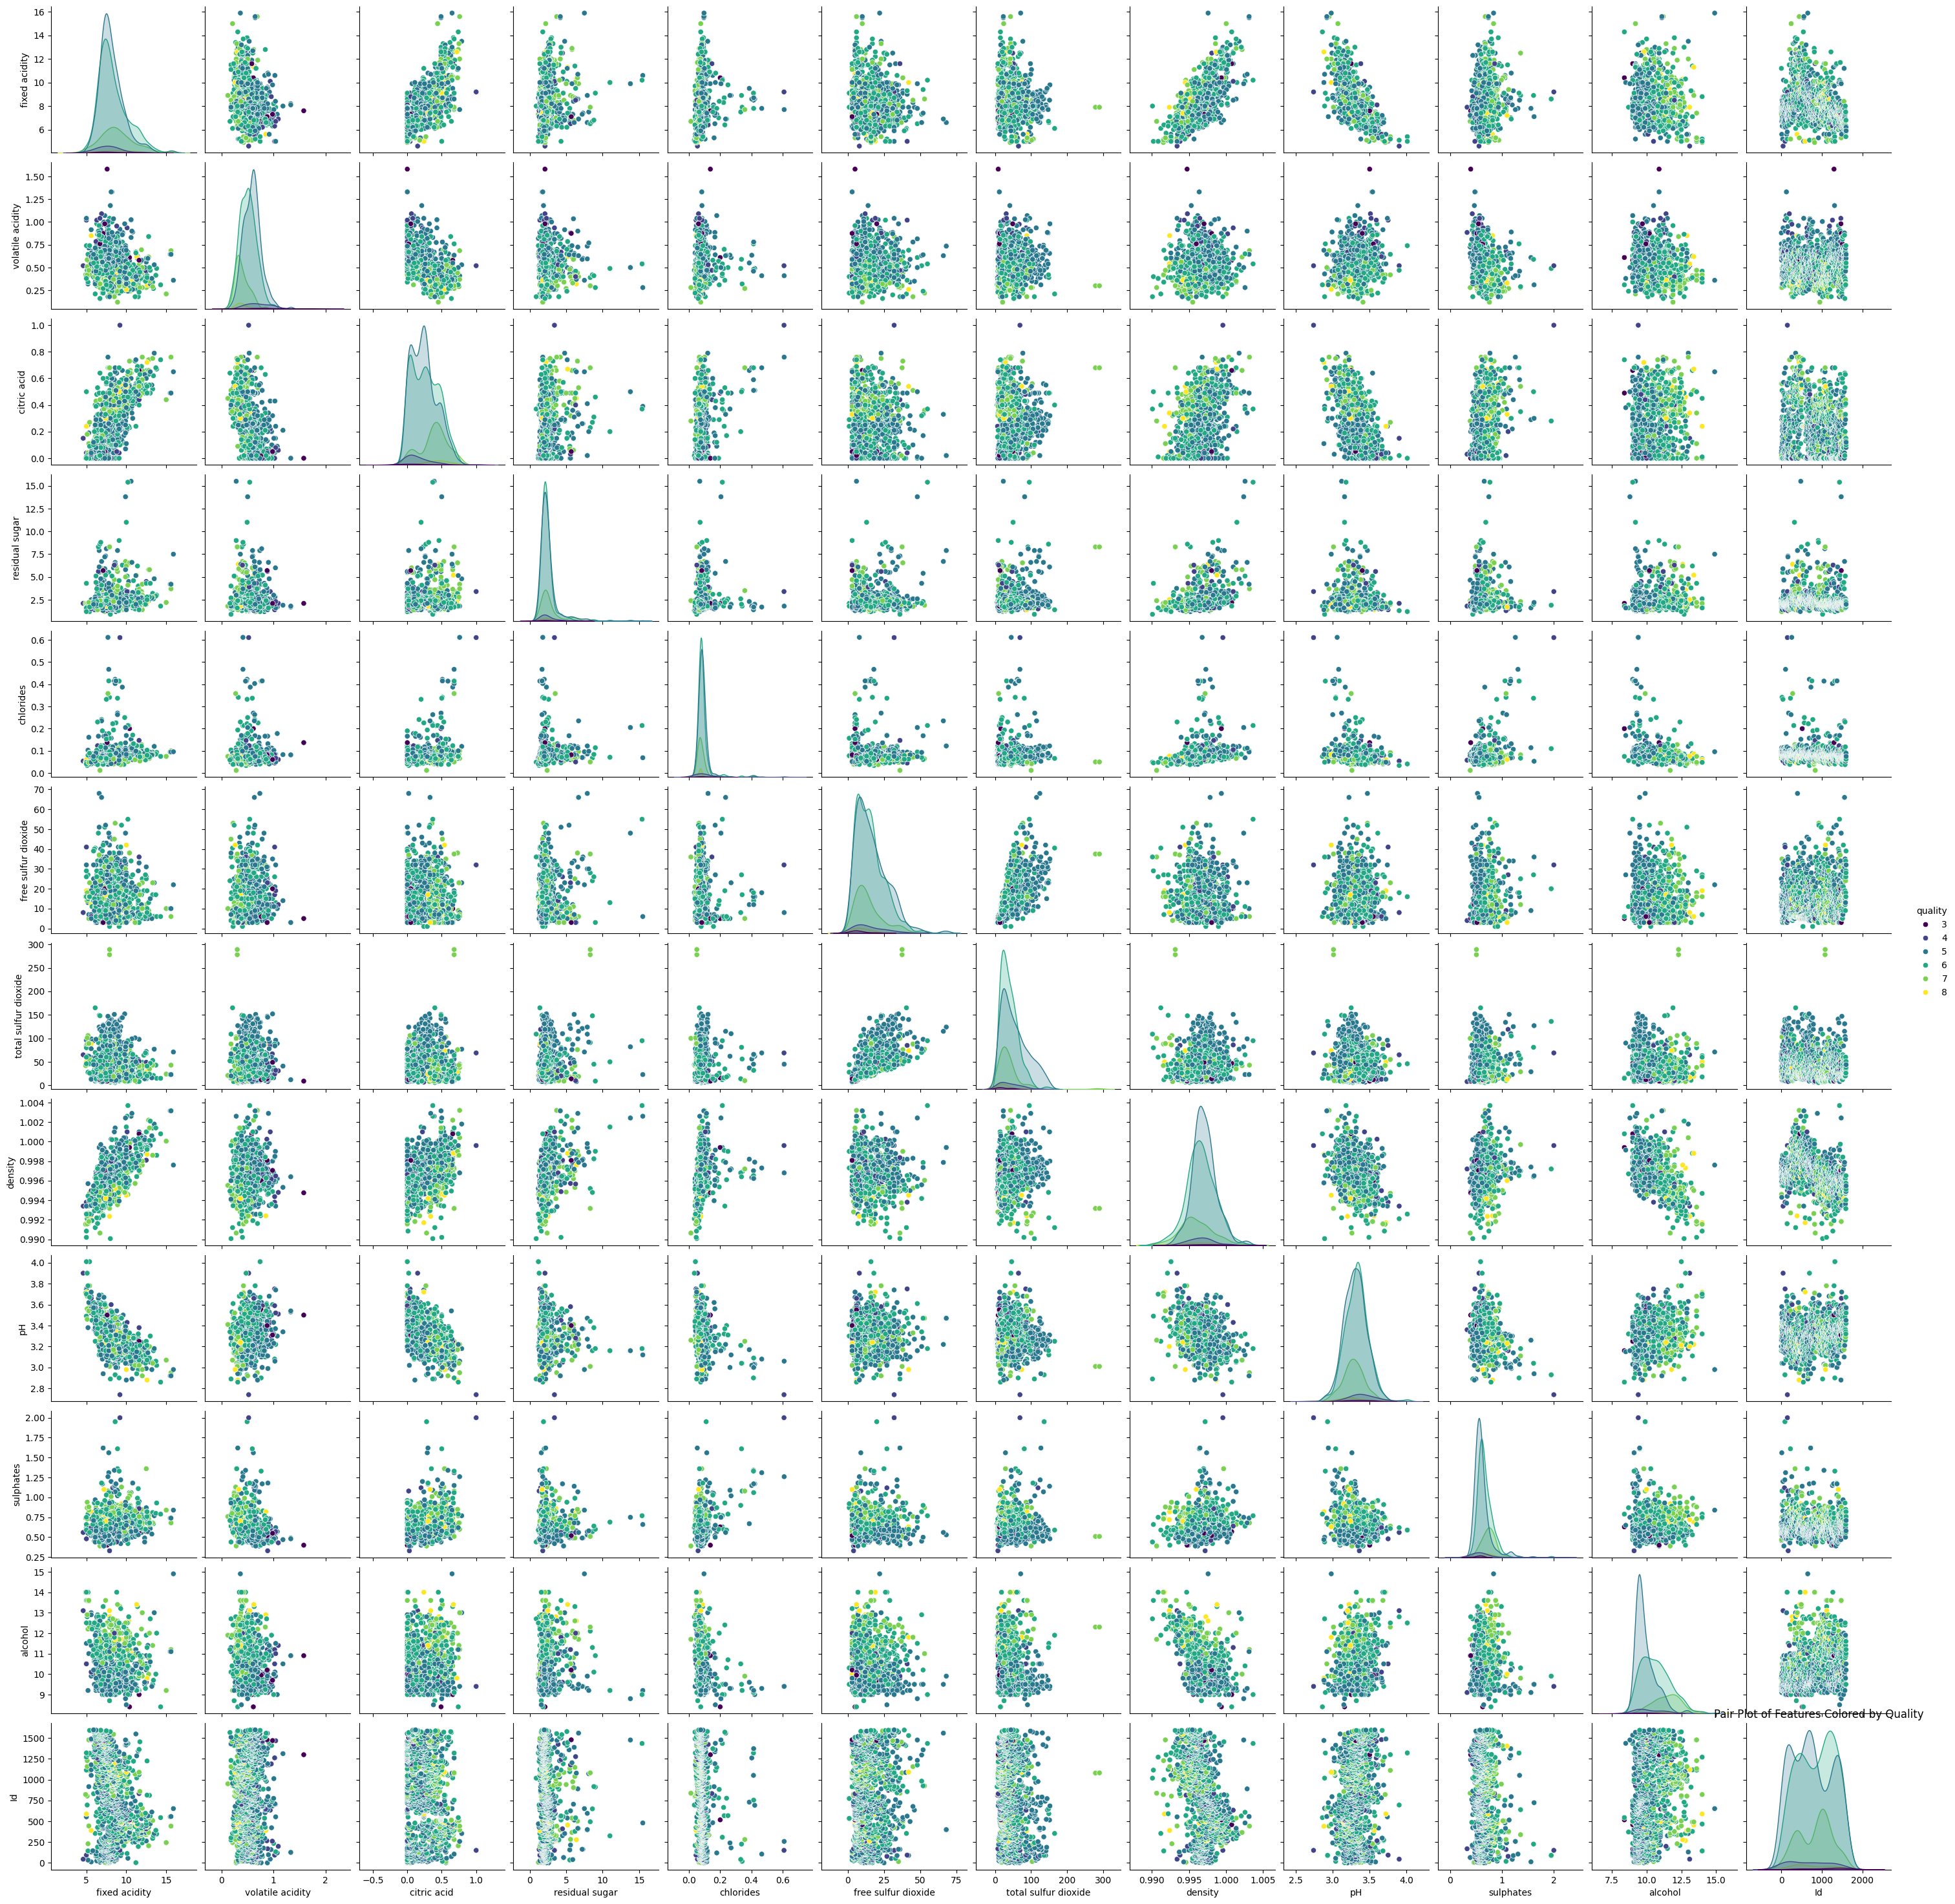

In [19]:
# Pair plot for selected features colored by wine quality
plt.figure(figsize=(12, 8))
sns.pairplot(data, hue='quality', palette='viridis', diag_kind='kde')
plt.title('Pair Plot of Features Colored by Quality')
plt.show()


**Swarm Plot**

C:\Users\MATHAN\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\MATHAN\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 17.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\MATHAN\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


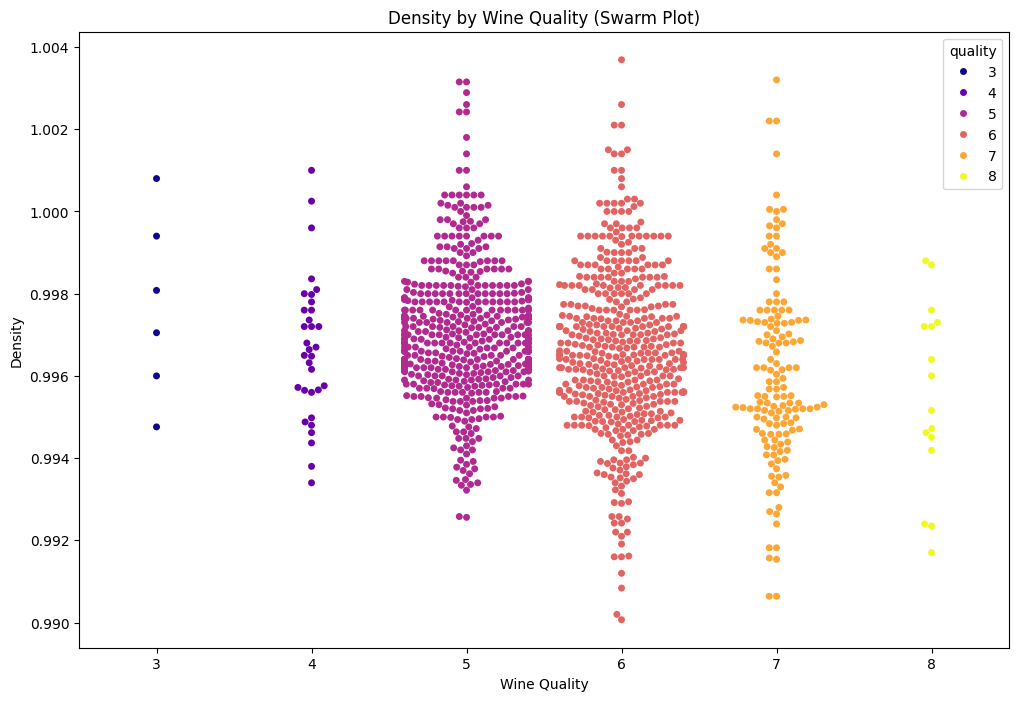

In [21]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='quality', y='density', data=data, hue='quality', palette='plasma')
plt.title('Density by Wine Quality (Swarm Plot)')
plt.xlabel('Wine Quality')
plt.ylabel('Density')
plt.show()


**Violin Plot**

C:\Users\MATHAN\AppData\Local\Temp\ipykernel_4816\255484500.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='quality', y='fixed acidity', data=data, palette='coolwarm')


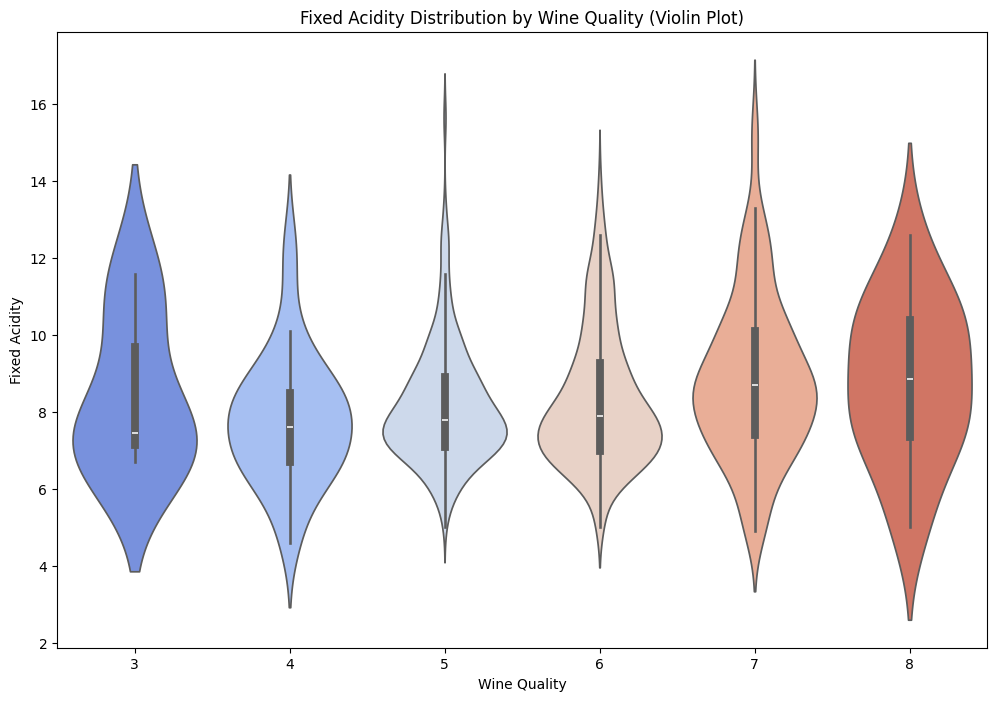

In [22]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='quality', y='fixed acidity', data=data, palette='coolwarm')
plt.title('Fixed Acidity Distribution by Wine Quality (Violin Plot)')
plt.xlabel('Wine Quality')
plt.ylabel('Fixed Acidity')
plt.show()


**Correlation Heatmap with Color Palette**

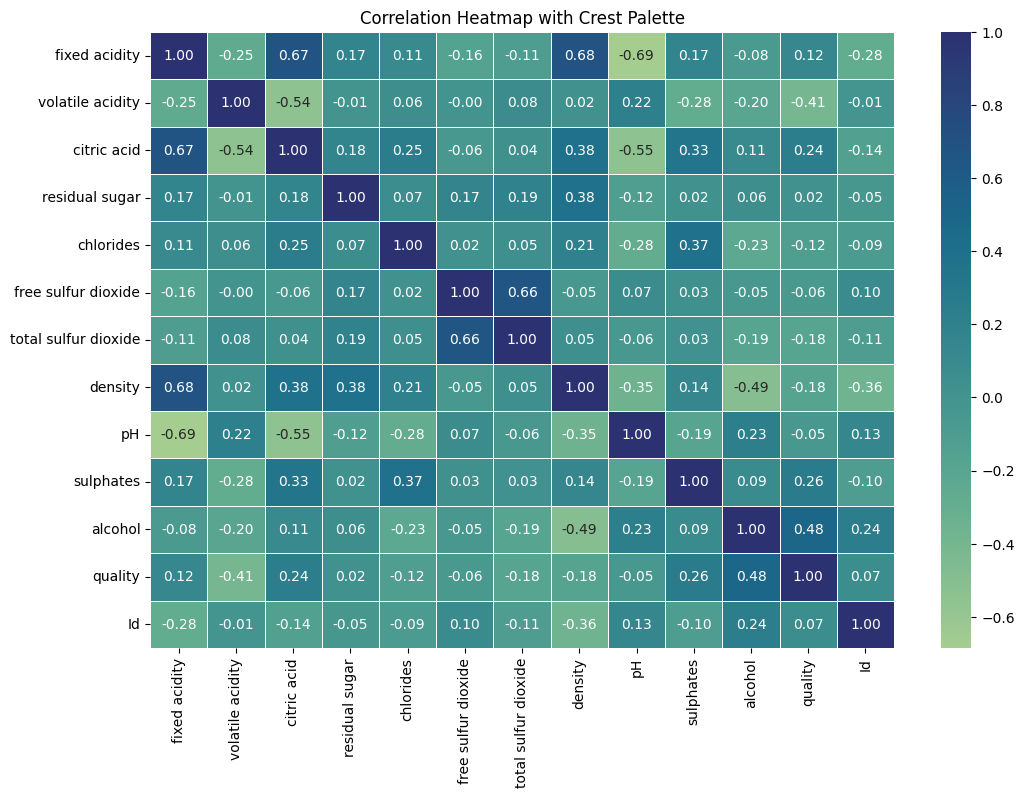

In [23]:
plt.figure(figsize=(12, 8))
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='crest', linewidths=.5)
plt.title('Correlation Heatmap with Crest Palette')
plt.show()


**Count Plot with a Color Palette**

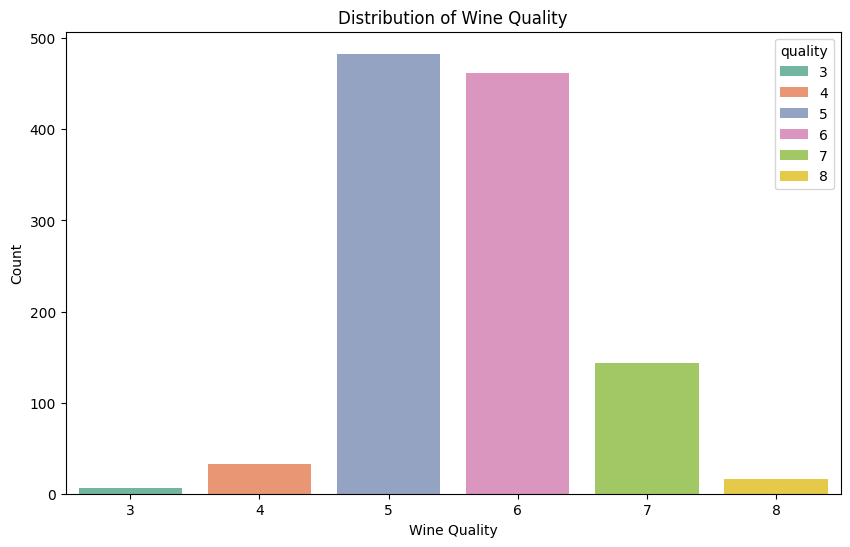

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=data,hue='quality', palette='Set2')
plt.title('Distribution of Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.show()


**KDE Plot**

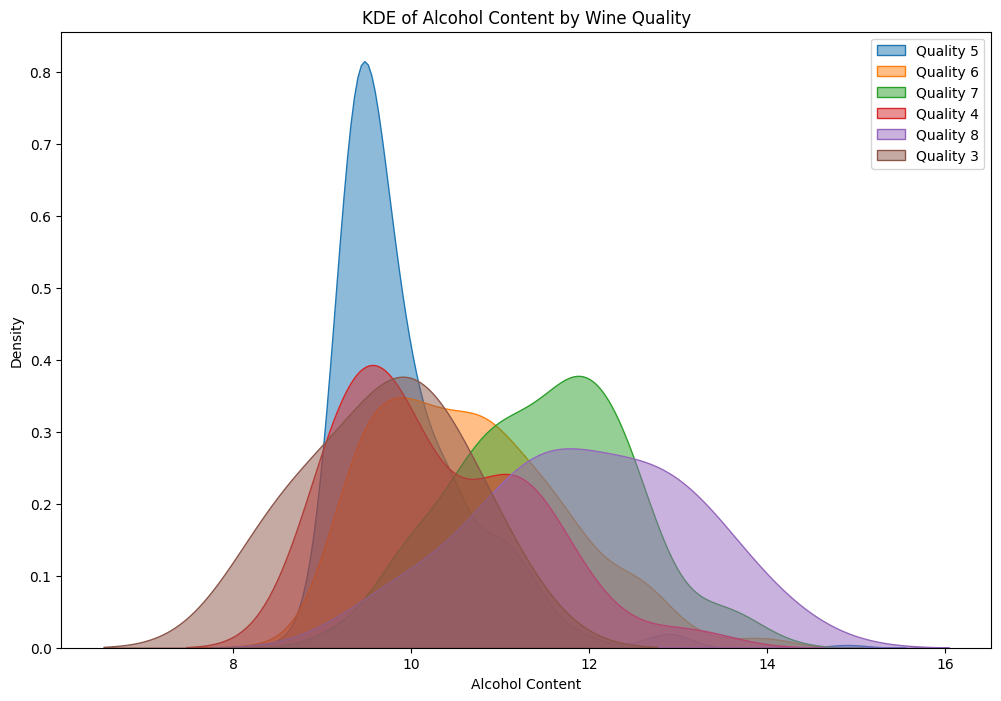

In [26]:
plt.figure(figsize=(12, 8))
for quality in data['quality'].unique():
    sns.kdeplot(data[data['quality'] == quality]['alcohol'], label=f'Quality {quality}', fill=True, alpha=0.5)
plt.title('KDE of Alcohol Content by Wine Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Density')
plt.legend()
plt.show()


**Scatter Plot with Regression Line**

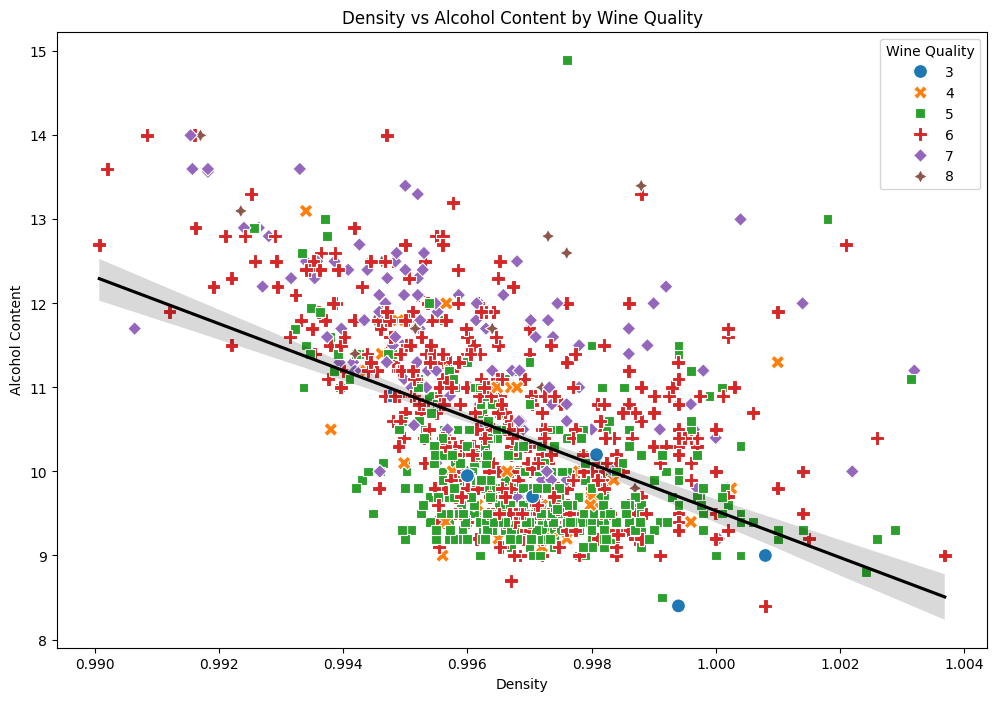

In [27]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='density', y='alcohol', hue='quality', data=data, palette='tab10', style='quality', s=100)
sns.regplot(x='density', y='alcohol', data=data, scatter=False, color='black')
plt.title('Density vs Alcohol Content by Wine Quality')
plt.xlabel('Density')
plt.ylabel('Alcohol Content')
plt.legend(title='Wine Quality')
plt.show()


**Bar Plot for Average Features by Quality**

<Figure size 1200x600 with 0 Axes>

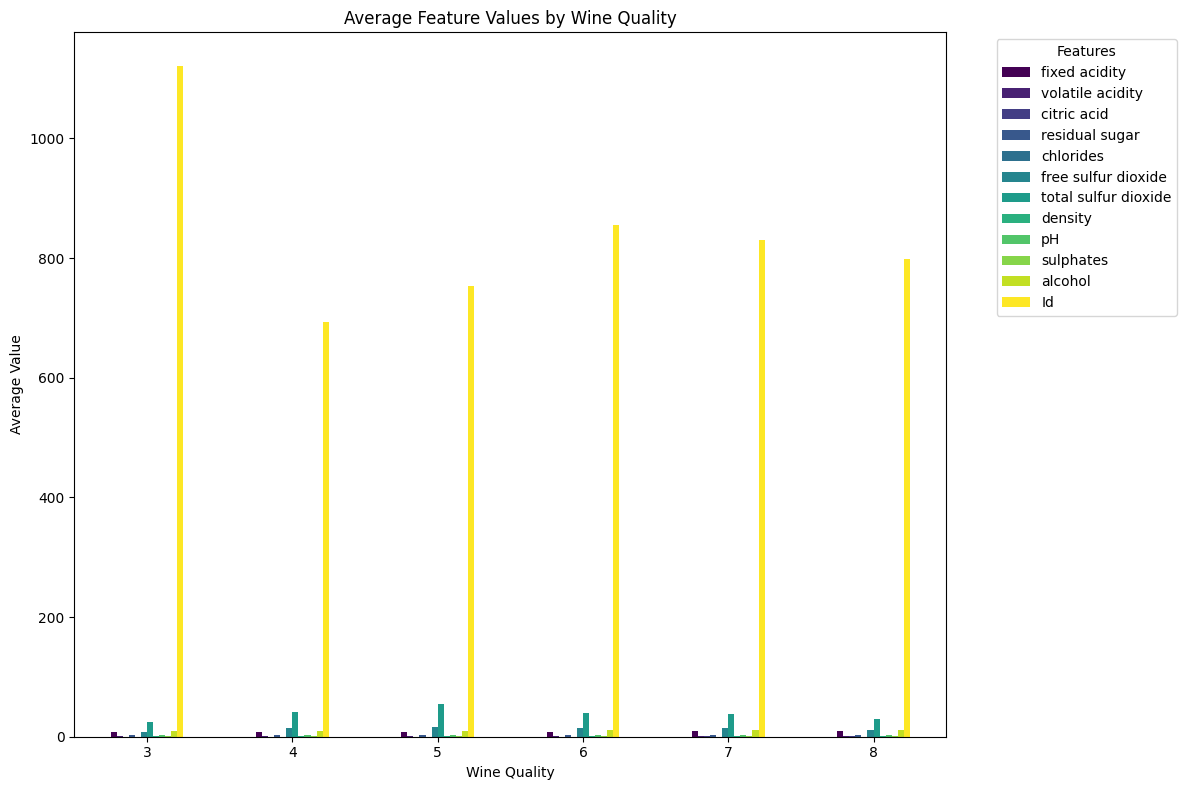

In [31]:
average_features = data.groupby('quality').mean()

plt.figure(figsize=(12, 6))
average_features.plot(kind='bar', colormap='viridis', figsize=(12, 8))
plt.title('Average Feature Values by Wine Quality')
plt.ylabel('Average Value')
plt.xlabel('Wine Quality')
plt.xticks(rotation=0)
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Box Plot**

In [35]:
# Set the file path
file_path = 'WineQT.csv'

# Read the CSV file
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [41]:
import pandas as pd

# Load the dataset 
df = pd.read_csv('WineQT.csv')


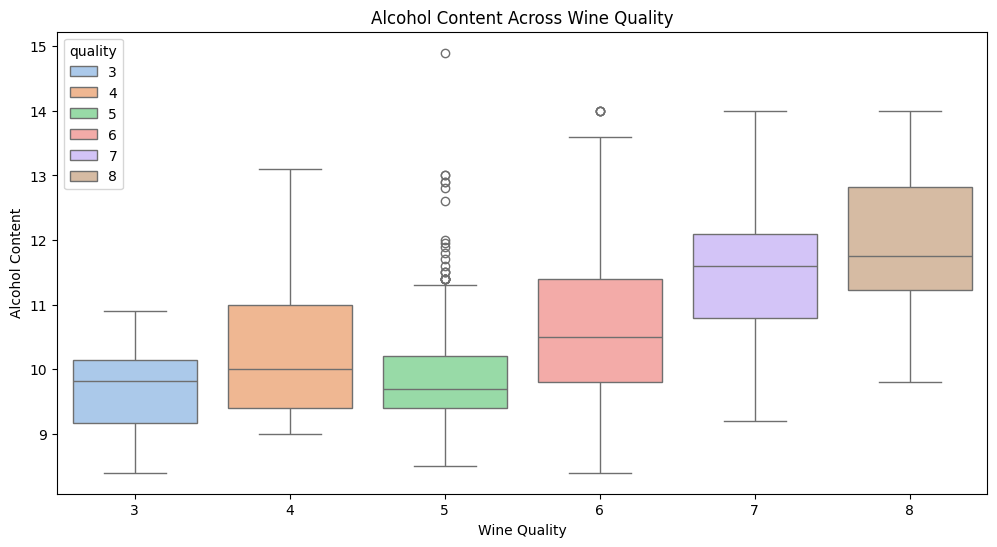

In [43]:

# Box plot for alcohol content
plt.figure(figsize=(12, 6))
sns.boxplot(x='quality', y='alcohol', data=df, hue='quality', palette='pastel')
plt.title('Alcohol Content Across Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol Content')
plt.show()


**Distribution Plot**

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

<Figure size 1200x600 with 0 Axes>

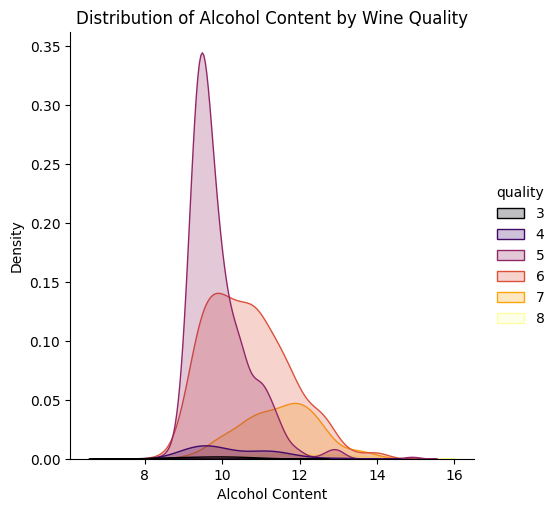

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('WineQT.csv') 
print(df.head())

# Distribution plot for alcohol
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.displot(df, x='alcohol', hue='quality', kind='kde', palette='inferno', fill=True)
plt.title('Distribution of Alcohol Content by Wine Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Density')
plt.show()


**Feature Relationships with Quality**

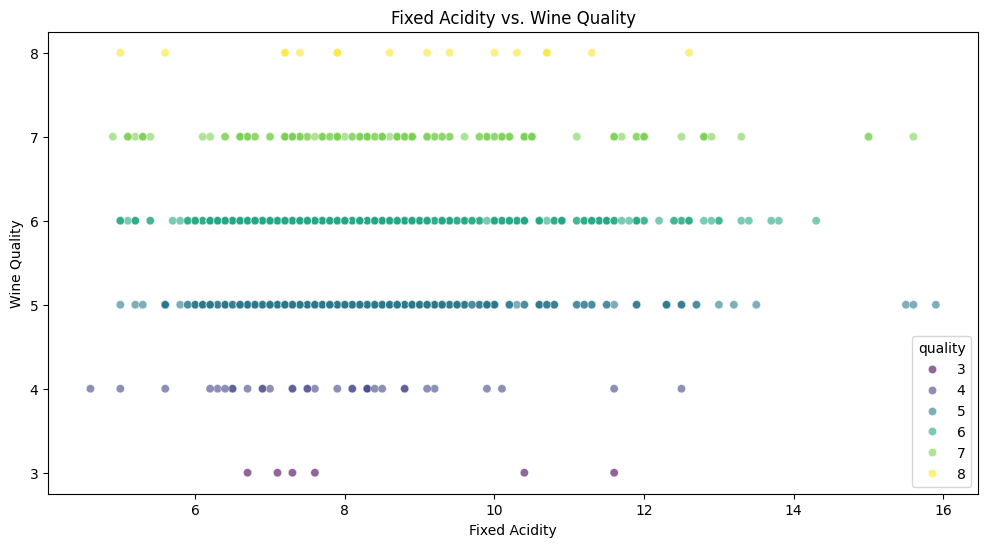

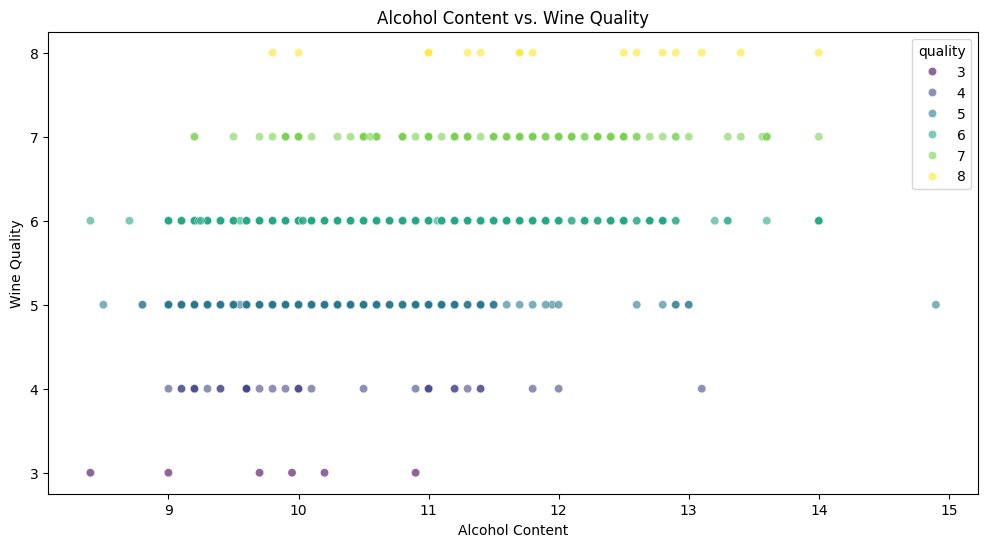

In [45]:
# Scatter plots for fixed acidity vs. quality
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='fixed acidity', y='quality', hue='quality', palette='viridis', alpha=0.6)
plt.title('Fixed Acidity vs. Wine Quality')
plt.xlabel('Fixed Acidity')
plt.ylabel('Wine Quality')
plt.show()

# Scatter plots for alcohol vs. quality
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='alcohol', y='quality', hue='quality', palette='viridis', alpha=0.6)
plt.title('Alcohol Content vs. Wine Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Wine Quality')
plt.show()
